In [42]:
import numpy as np
import pandas as pd

In [43]:
df = pd.read_csv("../predictive_maintenance.csv")
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [44]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
UDI,10000.0,5000.50000,2886.895680,1.0,2500.75,5000.5,7500.25,10000.0
Air temperature [K],10000.0,300.00493,2.000259,295.3,298.30,300.1,301.50,304.5
Process temperature [K],10000.0,310.00556,1.483734,305.7,308.80,310.1,311.10,313.8
Rotational speed [rpm],10000.0,1538.77610,179.284096,1168.0,1423.00,1503.0,1612.00,2886.0
Torque [Nm],10000.0,39.98691,9.968934,3.8,33.20,40.1,46.80,76.6
Tool wear [min],10000.0,107.95100,63.654147,0.0,53.00,108.0,162.00,253.0
Target,10000.0,0.03390,0.180981,0.0,0.00,0.0,0.00,1.0


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [46]:
df.nunique()

UDI                        10000
Product ID                 10000
Type                           3
Air temperature [K]           93
Process temperature [K]       82
Rotational speed [rpm]       941
Torque [Nm]                  577
Tool wear [min]              246
Target                         2
Failure Type                   6
dtype: int64

In [47]:
df["Type"].value_counts()

Type
L    6000
M    2997
H    1003
Name: count, dtype: int64

In [48]:
df["Failure Type"].value_counts()

Failure Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64

In [49]:
X = df.drop(['UDI','Product ID','Target',"Failure Type"],axis=1)
y = df['Failure Type']
X = pd.get_dummies(X).astype('int')
X

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Type_H,Type_L,Type_M
0,298,308,1551,42,0,0,0,1
1,298,308,1408,46,3,0,1,0
2,298,308,1498,49,5,0,1,0
3,298,308,1433,39,7,0,1,0
4,298,308,1408,40,9,0,1,0
...,...,...,...,...,...,...,...,...
9995,298,308,1604,29,14,0,0,1
9996,298,308,1632,31,17,1,0,0
9997,299,308,1645,33,22,0,0,1
9998,299,308,1408,48,25,1,0,0


In [50]:
X_columns = X.columns.to_numpy()

In [51]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[0.33333333, 0.375     , 0.22293364, ..., 0.        , 0.        ,
        1.        ],
       [0.33333333, 0.375     , 0.13969732, ..., 0.        , 1.        ,
        0.        ],
       [0.33333333, 0.375     , 0.19208382, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.44444444, 0.375     , 0.27764843, ..., 0.        , 0.        ,
        1.        ],
       [0.44444444, 0.375     , 0.13969732, ..., 1.        , 0.        ,
        0.        ],
       [0.44444444, 0.375     , 0.19324796, ..., 0.        , 0.        ,
        1.        ]])

In [52]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y.max()

5

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [54]:
!pip install imbalanced-learn==0.12.2

In [55]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(sampling_strategy="auto") 
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train) 

In [56]:
# from imblearn.over_sampling import SMOTE 
# sm = SMOTE(sampling_strategy="auto") 
# X_resampled, y_resampled = sm.fit_resample(X_scaled, y)   

In [57]:
np.unique(y_train_resampled,return_counts=True)

(array([0, 1, 2, 3, 4, 5]),
 array([7717, 7717, 7717, 7717, 7717, 7717], dtype=int64))

In [58]:
np.unique(y_train_resampled,return_counts=True)

(array([0, 1, 2, 3, 4, 5]),
 array([7717, 7717, 7717, 7717, 7717, 7717], dtype=int64))

In [59]:
X_train_resampled = pd.DataFrame(X_train_resampled, columns=X_columns)
y_train_resampled = pd.DataFrame(y_train_resampled, columns=['Target'])
X_test = pd.DataFrame(X_test, columns=X_columns)
y_test = pd.DataFrame(y_test, columns=['Target'])

In [62]:
import pycaret 
from pycaret.classification import *
s= setup(data = pd.concat([X_train_resampled, y_train_resampled], axis=1),
          target = 'Target',
          session_id = 42,
          data_split_stratify = True,
          index = False,
          train_size = len(X_train),
          test_data = pd.concat([X_test, y_test], axis=1))

,Description,Value
0,Session id,42
1,Target,Target
2,Target type,Multiclass
3,Original data shape,"(48302, 9)"
4,Transformed data shape,"(48302, 9)"
5,Transformed train set shape,"(46302, 9)"
6,Transformed test set shape,"(2000, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [63]:
best_model = compare_models(sort = 'F1')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9971,0.9999,0.9971,0.9971,0.9971,0.9965,0.9965,1.1760
et,Extra Trees Classifier,0.9968,1.0000,0.9968,0.9969,0.9968,0.9962,0.9962,0.3230
rf,Random Forest Classifier,0.9960,0.9999,0.9960,0.9960,0.9960,0.9952,0.9952,0.8430
dt,Decision Tree Classifier,0.9932,0.9959,0.9932,0.9933,0.9932,0.9919,0.9919,0.0690
gbc,Gradient Boosting Classifier,0.9905,0.0000,0.9905,0.9907,0.9905,0.9886,0.9887,6.9570
knn,K Neighbors Classifier,0.9856,0.9967,0.9856,0.9859,0.9854,0.9827,0.9829,0.3780
lr,Logistic Regression,0.8804,0.0000,0.8804,0.8767,0.8772,0.8564,0.8570,1.0010
svm,SVM - Linear Kernel,0.8546,0.0000,0.8546,0.8512,0.8473,0.8255,0.8275,0.0560
lda,Linear Discriminant Analysis,0.8100,0.0000,0.8100,0.8107,0.8006,0.7720,0.7761,0.0280
ridge,Ridge Classifier,0.7783,0.0000,0.7783,0.7773,0.7609,0.7340,0.7402,0.0260


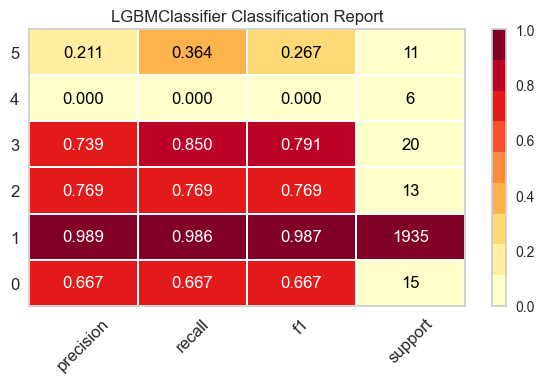

In [64]:
from matplotlib import pyplot as plt
plt.figure(figsize = (6,4))
plot_model(best_model, plot = 'class_report')

In [ ]:
X_resampled.shape

NameError: name 'X_resampled' is not defined

In [ ]:
y_resampled.shape

(57912,)

In [ ]:
# Convert X and y to pandas DataFrame
X_df = pd.DataFrame(X_resampled, columns=X_columns)
y_df = pd.DataFrame(y_resampled, columns=['Target'])

# Concatenate X and y along columns
df = pd.concat([X_df, y_df], axis=1)

# Write DataFrame to CSV file
df.to_csv('processed_data.csv', index=False)